importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Housing.csv')

In [4]:
df.head()

,Unnamed: 0,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        545 non-null    int64 
 1   price             545 non-null    int64 
 2   area              545 non-null    int64 
 3   bedrooms          545 non-null    int64 
 4   bathrooms         545 non-null    int64 
 5   stories           545 non-null    int64 
 6   mainroad          545 non-null    object
 7   guestroom         545 non-null    object
 8   basement          545 non-null    object
 9   hotwaterheating   545 non-null    object
 10  airconditioning   545 non-null    object
 11  parking           545 non-null    int64 
 12  prefarea          545 non-null    object
 13  furnishingstatus  545 non-null    object
dtypes: int64(7), object(7)
memory usage: 59.7+ KB


(545, 14)

In [6]:
df.isnull().sum()

Unnamed: 0          0
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.nunique()

Unnamed: 0          545
price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [8]:
df.describe()

,Unnamed: 0,price,area,bedrooms,bathrooms,stories,parking
count,545.00000,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,272.00000,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,157.47222,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,0.00000,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,136.00000,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,272.00000,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,408.00000,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,544.00000,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


mainroad	guestroom	basement	hotwaterheating	airconditioning prefarea	furnishingstatus

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
s = LabelEncoder()


df['mainroad']=s.fit_transform(df['mainroad'])
df['guestroom']=s.fit_transform(df['guestroom'])
df['basement']=s.fit_transform(df['basement'])
df['hotwaterheating']=s.fit_transform(df['hotwaterheating'])
df['airconditioning']=s.fit_transform(df['airconditioning'])
df['prefarea']=s.fit_transform(df['prefarea'])
df['furnishingstatus']=s.fit_transform(df['furnishingstatus'])


In [10]:
df

,Unnamed: 0,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


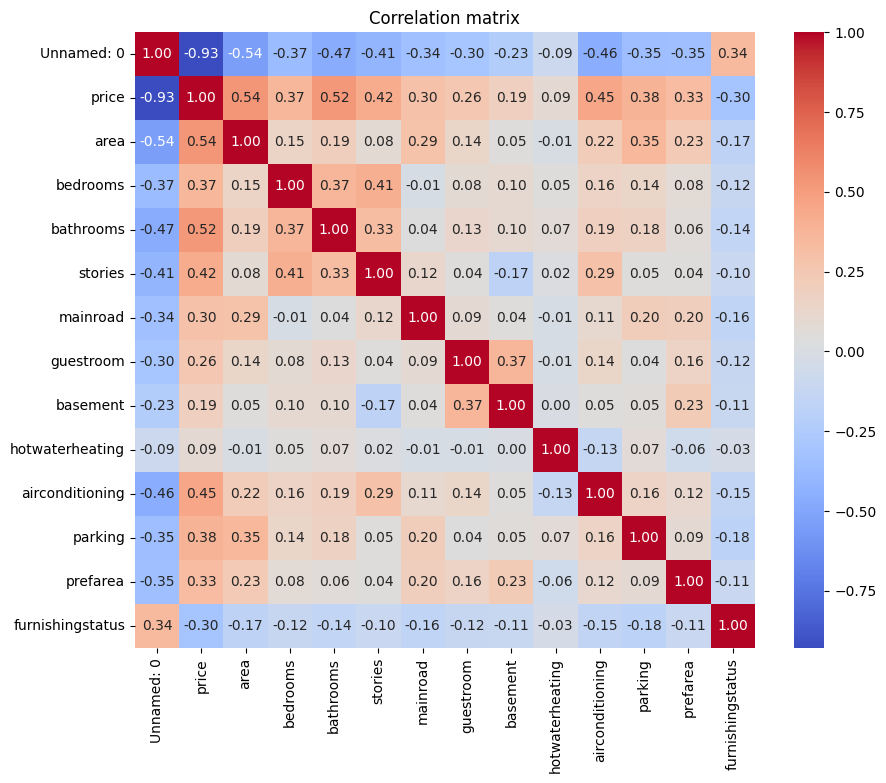

In [11]:
df_corr=df.corr()
df_corr=df_corr.astype(float)
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation matrix')
plt.show()

In [12]:
df.columns

Index(['Unnamed: 0', 'price', 'area', 'bedrooms', 'bathrooms', 'stories',
       'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [13]:
columns_to_remove=['stories','mainroad','hotwaterheating','basement','airconditioning']
df=df.drop(columns=columns_to_remove)

In [14]:
df.head()

,Unnamed: 0,price,area,bedrooms,bathrooms,guestroom,parking,prefarea,furnishingstatus
0,0,13300000,7420,4,2,0,2,1,0
1,1,12250000,8960,4,4,0,3,0,0
2,2,12250000,9960,3,2,0,2,1,1
3,3,12215000,7500,4,2,0,3,1,0
4,4,11410000,7420,4,1,1,2,0,0


In [15]:
import scipy.stats as  stats
z_scores=stats.zscore(df)
threshold=3
print("size before removing outliers:",df.shape)
outliers_df=df[(z_scores>threshold).any(axis=1)]
df=df[(z_scores<=threshold).all(axis=1)]
print("size after removing outliers:",df.shape)

size before removing outliers: (545, 9)
size after removing outliers: (522, 9)


In [16]:
outliers_df.head()

,Unnamed: 0,price,area,bedrooms,bathrooms,guestroom,parking,prefarea,furnishingstatus
0,0,13300000,7420,4,2,0,2,1,0
1,1,12250000,8960,4,4,0,3,0,0
2,2,12250000,9960,3,2,0,2,1,1
3,3,12215000,7500,4,2,0,3,1,0
4,4,11410000,7420,4,1,1,2,0,0


In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
df_scaled=pd.DataFrame(scaler.transform(df),columns=df.columns)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [19]:
x=df.drop('price',axis=1)
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [20]:
print(f"xtrain {x_train.shape}")
print(f"xtest {x_test.shape}")

xtrain (391, 8)
xtest (131, 8)


In [21]:
models=[
    ('Random Forest',RandomForestRegressor()),
   
]

In [22]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [23]:
for name,model in models:
    print(name)
    print()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("mean_squared_error",mean_squared_error(y_test,y_pred))
    print('\n')
    print("Mean Absolute error",mean_absolute_error(y_test,y_pred))
    print('\n')
    print("R squared(R2)",r2_score(y_test,y_pred))
    print('\n')

Random Forest

mean_squared_error 3483108889.2247343


Mean Absolute error 24015.5251908397


R squared(R2) 0.998901479394039


